# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Nurcahya
- **Email:** dimasnurcahya478@gmail.com
- **ID Dicoding:** [dimas_nch]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari kerja dengan cuaca yang sama?
- Pada jam berapa jumlah penyewaan sepeda mencapai puncaknya, dan bagaimana pola penyewaan berubah sepanjang hari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day.csv dari repositori github menjadi sebuah dataframe

In [30]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dirch4/Submission_Proyek_Analisis_Data_Dimas_N/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour.csv dari repositori github menjadi sebuah dataframe

In [31]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dirch4/Submission_Proyek_Analisis_Data_Dimas_N/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Semua data yang dibutuhkan sudah dikumpulkan dan buat menjadi dataframe
- Menampilkan 5 baris pertama dari setiap DataFrame

### Assessing Data

Menilai tabel **day_df**

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menilai tabel **hour_df**

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
print("\nMissing values in day_df:", day_df.isnull().sum().sum())
print("Missing values in hour_df:", hour_df.isnull().sum().sum())


Missing values in day_df: 0
Missing values in hour_df: 0


In [35]:
print("\nJumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- Pada dataset tersebut tidak terdapat missing values ataupun duplikasi.
- Terdapat kolom dteday yang bertipe data object, seharusnya bertipe datetime.
- Nama kolom yang disingkat dapat membingungkan.

### Cleaning Data

Mengubah nama kolom

In [36]:
day_df.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'hr': 'hour',}, inplace=True)
hour_df.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'hr': 'hour'}, inplace=True)

Mengubah tipe data object menjadi datetime pada kolom dateday

In [37]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

Mengubah season value menjadi label

In [38]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

Menggabungkan kedua dataframe

In [39]:
all_df = hour_df.merge(day_df, on='dateday', suffixes=('_hour', '_day'))
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dateday          17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  object        
 3   year_hour        17379 non-null  int64         
 4   month_hour       17379 non-null  int64         
 5   hour             17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

**Insight:**
- Nama kolom yang disingkat sudah di rename menjadi tidak disingkat
- Mengubah tipe data object pada kolom dateday menjadi tipe data datetime
- Mengubah value dari season yaitu dengan 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
- Menggabungkan kedua dataframe

## Exploratory Data Analysis (EDA)

### Explore ...

In [40]:
display(day_df.describe())

,instant,dateday,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [41]:
display(hour_df.describe())

,instant,dateday,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [42]:
hour_df.groupby(by="season").agg(
    instant_count=("instant", "nunique"),
    max_rental=("cnt", "max"),
    min_rental=("cnt", "min"),
    mean_rental=("cnt", "mean"),
    std_rental=("cnt", "std")
)


,instant_count,max_rental,min_rental,mean_rental,std_rental
season,,,,,
Fall,4496,977,1,236.016237,197.711630
Spring,4242,801,1,111.114569,119.224010
Summer,4409,957,1,208.344069,188.362473
Winter,4232,967,1,198.868856,182.967972


**Insight:**
- Jumlah Data Terdapat 17.379 entri data, yang mencakup informasi dari 1 Januari 2011 hingga 31 Desember 2012
- Rata-rata penyewaan sepeda per jam adalah 189,46, dengan nilai minimum 1 dan maksimum 977
- Rata-rata penyewaan sepeda per hari adalah 4504, dengan nilai minimum 22 dan maksimum 8714
- Jumlah penyewa yang sudah teregistrasi(registered) lebih tinggi yaitu	3656 penyewa dibandingkan dengan penyewa yang tidak teregistrasi(casual) sebanyak 848 penyewa perhari
- Rata-rata penyewaan per jam tertinggi terjadi pada Fall (236.02), diikuti Summer (208.34), Winter (198.87), dan Spring (111.11).
- Spring memiliki rata-rata penyewaan terendah, yang mungkin disebabkan oleh faktor cuaca atau kebiasaan pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

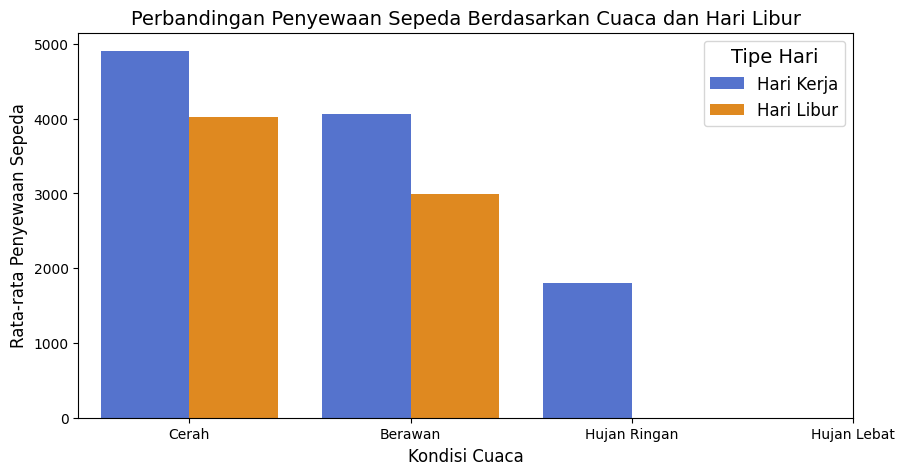

In [43]:
plt.figure(figsize=(10, 5))
weather_counts = day_df.groupby(["weathersit", "holiday"])['cnt'].mean().reset_index()

sns.barplot(
    x="weathersit",
    y="cnt",
    hue="holiday",
    data=weather_counts,
    palette=["royalblue", "darkorange"],
    hue_order=[0, 1]
)

plt.title("Perbandingan Penyewaan Sepeda Berdasarkan Cuaca dan Hari Libur", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)

plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"], fontsize=10)

legend = plt.legend(title="Tipe Hari", fontsize=12, title_fontsize=14, frameon=True)

legend.texts[0].set_text("Hari Kerja")
legend.texts[1].set_text("Hari Libur")

plt.show()

**Insight**:
- Penyewaan sepeda tertinggi terjadi saat cuaca cerah, baik pada hari kerja maupun hari libur.
- Semakin buruk kondisi cuaca, semakin rendah jumlah penyewaan sepeda.

### Pertanyaan 2:

<ipython-input-44-947e5683b763>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df['hour'], y=hour_df['cnt'], estimator='mean', ci=None)


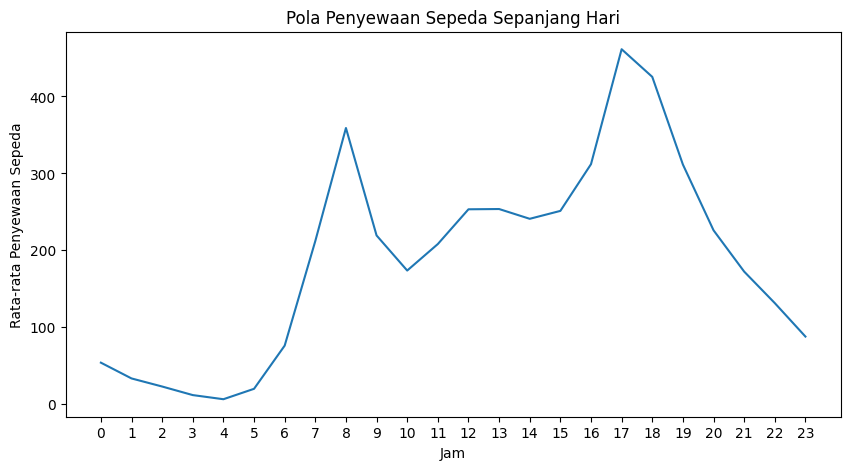

In [44]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df['hour'], y=hour_df['cnt'], estimator='mean', ci=None)
plt.title("Pola Penyewaan Sepeda Sepanjang Hari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Penyewaan sepeda mencapai puncaknya pada pukul 17:00 (jam 5 sore), menunjukkan bahwa banyak orang menggunakan sepeda pada jam pulang kerja/sekolah.
- Puncak lainnya terjadi pada pukul 08:00 (jam 8 pagi), yang kemungkinan besar adalah jam berangkat kerja atau sekolah.

## Conclusion

- Cuaca cerah adalah kondisi terbaik untuk penyewaan sepeda, karena memiliki jumlah penyewaan tertinggi.
Hari kerja memiliki tingkat penyewaan lebih tinggi dibandingkan hari libur, kemungkinan karena penggunaan sepeda untuk keperluan kerja atau sekolah.
Cuaca buruk (hujan ringan & hujan lebat) menyebabkan penurunan drastis dalam penyewaan sepeda, yang berarti pengguna cenderung menghindari bersepeda saat hujan.
- Jam sibuk penyewaan sepeda terjadi pada pukul 08:00 dan 17:00, sesuai dengan jam berangkat dan pulang kerja/sekolah.
Penyewaan sepeda sangat rendah pada dini hari (00:00 - 05:00), menunjukkan bahwa penggunaan sepeda pada waktu ini sangat terbatas.
Siang hari memiliki penyewaan yang cukup stabil, tetapi tidak setinggi jam sibuk.
Malam hari penyewaan mulai menurun, kemungkinan karena berkurangnya aktivitas luar ruangan.

In [45]:
# Simpan ke CSV
all_df.to_csv("all_data.csv", index=False)